In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from constants import *

###  Agile Octopus London Home Electricity Prices, pounds per kilowatt-hour
Source: [My Smart Energy](https://mysmartenergy.uk/Download-Data/London)

If you have your half hourly consumption data from your smart meter you can use this Agile Octopus Prices file to check what your bill would be with this tariff. Both Local (including British Summer Time) and UTC (GMT) times are shown, please choose the correct column when matching to your consumption data. Prices are shown both with and without VAT added. When comparing bills please also note the daily standing charges.

#### Each 24 hour day would have two half hour measurements, so 48 data points in a day 


In [2]:
half_hourly_prices = pd.read_csv(f"{DATA_FOLDER}/recent_agile_octopus.csv")
half_hourly_prices.head()


,Valid_From_UTC,Valid_To_UTC,Valid_From_Local,Valid_To_Local,Price_Inc_VAT,Price_Ex_VAT
0,3/19/24 0:00,3/19/24 0:30,3/19/24 0:00,3/19/24 0:30,10.19,9.70
1,3/19/24 0:30,3/19/24 1:00,3/19/24 0:30,3/19/24 1:00,11.26,10.72
2,3/19/24 1:00,3/19/24 1:30,3/19/24 1:00,3/19/24 1:30,10.90,10.38
3,3/19/24 1:30,3/19/24 2:00,3/19/24 1:30,3/19/24 2:00,9.18,8.74
4,3/19/24 2:00,3/19/24 2:30,3/19/24 2:00,3/19/24 2:30,9.81,9.34


In [3]:
len(half_hourly_prices)

6764

In [4]:
date_column= 'Valid_From_UTC'
data_column = 'Price_Ex_VAT'
half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


/var/folders/v1/24qfth9s4hd8jjscffmwx4yw0000gn/T/ipykernel_2222/238797309.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


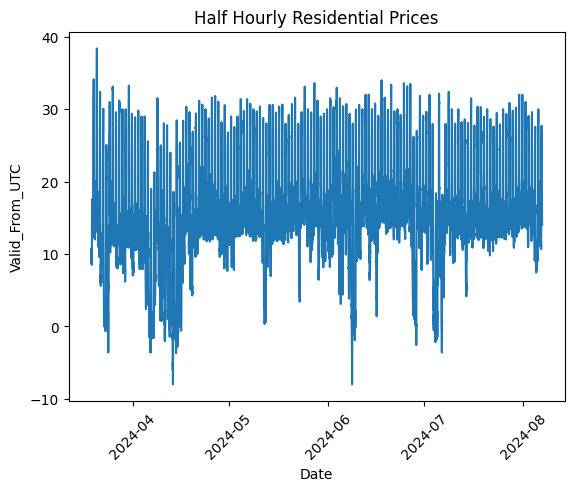

In [5]:
# Graph the daily average system price from 2020 to June 2024

plt.plot(half_hourly_prices[date_column], half_hourly_prices[data_column])
plt.xlabel('Date')
plt.ylabel(date_column)
plt.title('Half Hourly Residential Prices')
plt.xticks(rotation=45)
plt.show()


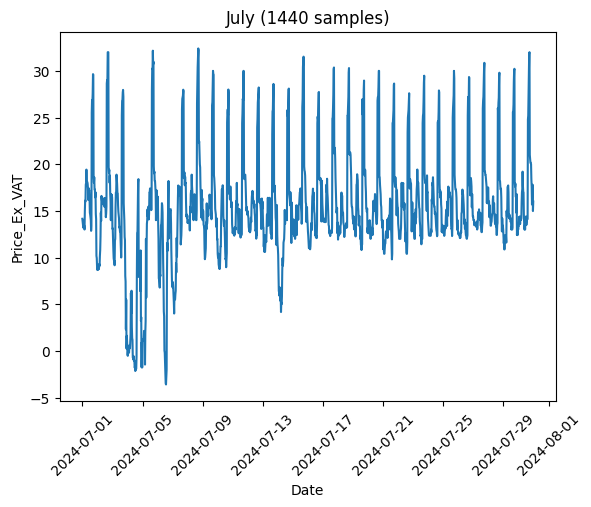

In [6]:
start_date = '2024-07-01'
end_date = '2024-07-31'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'July ({num_data_points} samples)')
plt.xticks(rotation=45)
plt.show()

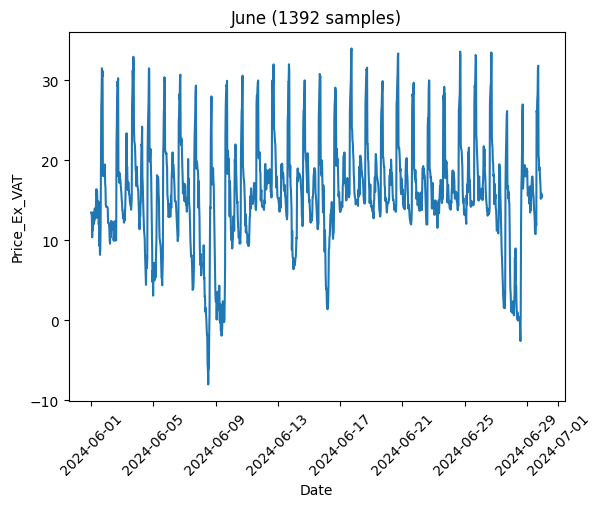

In [7]:
start_date = '2024-06-01'
end_date = '2024-06-30'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'June ({num_data_points} samples)')
plt.xticks(rotation=45)
plt.show()

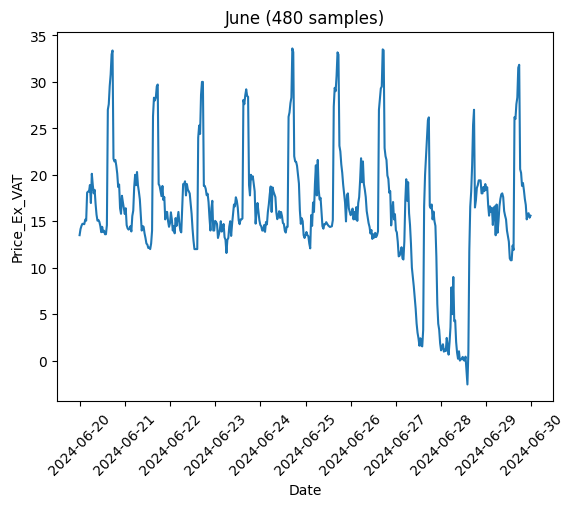

NameError: name 'get_data_stats' is not defined

In [8]:
start_date = '2024-06-20'
end_date = '2024-06-30'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'June ({num_data_points} samples)')
plt.xticks(rotation=45)
plt.show()

utils.get_data_stats(filtered_data[data_column])

In [ ]:
start_date = '2024-06-20'
end_date = '2024-06-27'
prediction_length = 48
date_column
_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos-tiny-336-48-8_000-alpha','chronos-tiny-336-48-8_000-beta','chronos-tiny-336-48-8_000-delta','chronos-tiny-336-48-8_000-abd','chronos_tiny','chronos_mini','chronos_small','chronos_base','chronos_base','chronos_large','arima','gp'],run_name='rwcd_one_week')
